In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
# Load the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform length
max_sequence_length = 200
X_train_pad = pad_sequences(X_train, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test, maxlen=max_sequence_length)


In [12]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [13]:
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
epochs = 5
batch_size = 1024

rnn = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
20/20 [==============================] - 41s 2s/step - loss: 0.6623 - accuracy: 0.6316 - val_loss: 0.5870 - val_accuracy: 0.7300
Epoch 2/5
20/20 [==============================] - 40s 2s/step - loss: 0.5293 - accuracy: 0.7842 - val_loss: 0.4045 - val_accuracy: 0.8348
Epoch 3/5
20/20 [==============================] - 38s 2s/step - loss: 0.3270 - accuracy: 0.8687 - val_loss: 0.3349 - val_accuracy: 0.8620
Epoch 4/5
20/20 [==============================] - 38s 2s/step - loss: 0.2362 - accuracy: 0.9096 - val_loss: 0.2954 - val_accuracy: 0.8766
Epoch 5/5
20/20 [==============================] - 39s 2s/step - loss: 0.1765 - accuracy: 0.9372 - val_loss: 0.3164 - val_accuracy: 0.8796


In [15]:
import matplotlib.pyplot as plt
def plot_graphs(rnn_model, string):
    plt.figure(figsize=(10,5))
    plt.plot(rnn_model.history[string], linewidth=2.0)
    plt.plot(rnn_model.history['val_'+string], linewidth=2.0)
    plt.xlabel("Epochs", fontsize=15)
    plt.ylabel(string, fontsize=15)
    plt.legend(['Training ' + string, 'Validation ' + string], fontsize=15, loc='upper left')
    plt.title(string + ' Curves',fontsize=15)
    plt.show()

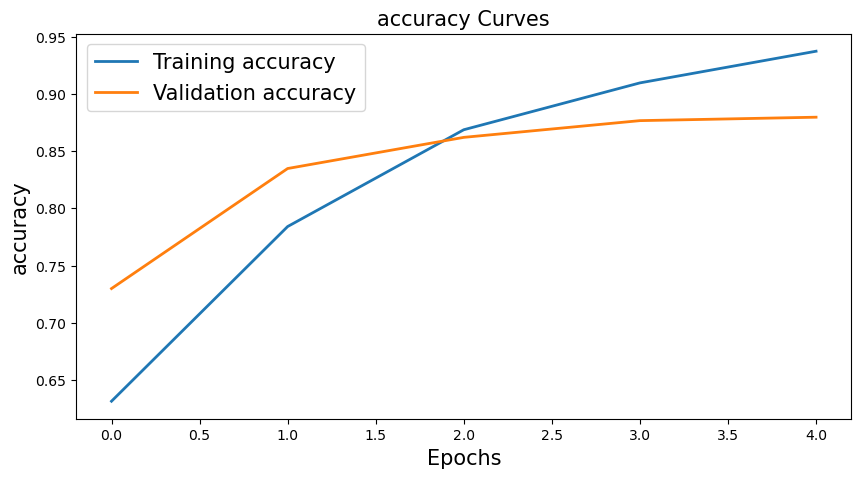

In [16]:
plot_graphs(rnn, 'accuracy')
